In [4]:
import torch
import matplotlib.pyplot as plt

def load_metrics_from_pt():
    loss = torch.load('/home/hsilva/DLA/Lab2/loss_plot.pt')
    accuracy = torch.load('/home/hsilva/DLA/Lab2/acc_plot.pt')

    return loss, accuracy

def create_metrics_plot(loss, accuracy):
    epochs = len(loss)
    plt.figure(figsize=(10, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), loss, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), accuracy, label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    

    plt.savefig('finetune1.png')
    plt.show()

# Replace 'metrics.pt' with the actual path to your .pt file
loss, accuracy = load_metrics_from_pt()
#create_metrics_plot(loss, accuracy)

In [5]:
accuracy

tensor([0.5919, 0.6529, 0.6107, 0.6313, 0.6285, 0.6820, 0.6848, 0.6567, 0.6735,
        0.6782, 0.6604, 0.6585, 0.6623, 0.6604, 0.6679, 0.6745, 0.6642, 0.6501,
        0.6689, 0.6811, 0.6726, 0.6726, 0.6614, 0.6576, 0.6698, 0.6501, 0.6782,
        0.6679, 0.6792, 0.6773, 0.6886, 0.6698, 0.6773, 0.6707, 0.6857])

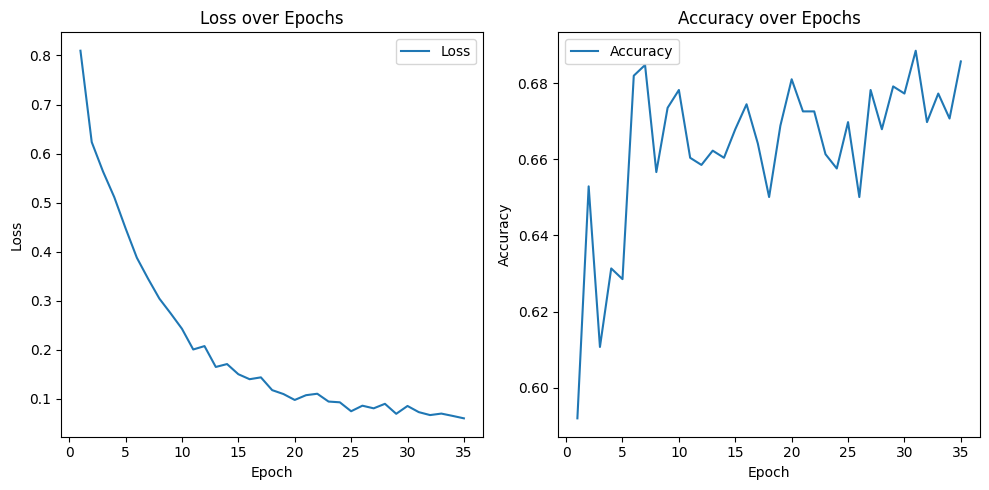

In [6]:
create_metrics_plot(loss, accuracy)